## PCA with Numpy

In [ ]:
import pandas as pd


# Read the csv data as a DataFrame
df = pd.read_csv('data/Dry_Bean.csv')

# Remove null and na values
df.dropna()

# 1. Print the DataFrame head
print(df.head())

# 2. Extract the numerical columns
data_matrix = df.drop(columns='Class')

# Extract the classes
classes = df['Class']

print(data_matrix)


    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

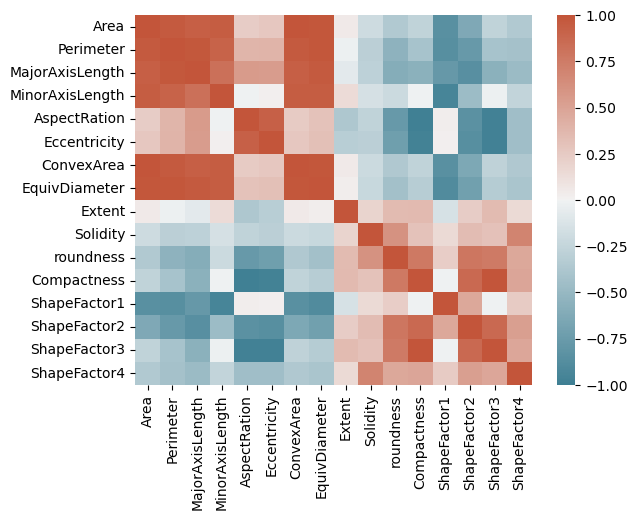

eigenvectors:  [[ 2.82457959e-01  2.45882017e-01 -6.14466787e-02 -3.15461931e-02
  -9.13256234e-02 -3.66390029e-01  1.25044861e-01  7.17479179e-02
   3.50665669e-02 -3.90419516e-01 -1.77686475e-01  5.44842282e-02
   4.62948861e-02  6.55727948e-01  2.31435926e-01  1.33190281e-01]
 [ 3.10891123e-01  1.79302922e-01 -1.88525952e-02 -4.24678975e-02
   8.18198663e-02 -1.02508210e-02  8.15296990e-02  3.17295058e-02
  -1.57501171e-01  3.44383066e-01  1.99453621e-01 -7.50549982e-01
   3.17920275e-01  8.13901113e-02  1.46143834e-02  1.26584691e-02]
 [ 3.25823976e-01  1.00756516e-01 -8.46919067e-02 -6.79308126e-03
  -4.42163116e-02 -1.49091929e-02  1.18162546e-01 -2.00947006e-01
  -3.52366452e-01  1.01996482e-01  1.73639683e-01  2.73549959e-02
  -6.85301970e-01 -1.86251185e-01  3.46019418e-01  1.74431583e-01]
 [ 2.36199383e-01  3.43460651e-01  7.50039030e-03 -6.12997105e-02
  -4.29258549e-03 -2.78820146e-02 -6.23528140e-02  9.47252766e-02
   4.14230636e-01  4.81150315e-01  4.73720993e-03  4.13935

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_matrix = pd.read_csv('data/data_matrix.csv')

# 1. Use the `.corr()` method on `data_matrix` to get the correlation matrix 
correlation_matrix = data_matrix.corr()

## Heatmap code:
red_blue = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, cmap=red_blue)
plt.show()

# 2. Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# 3. Print out the eigenvectors and eigenvalues
print('eigenvectors: ', eigenvectors)
#print(eigenvectors)

print('eigenvalues: ', eigenvalues)
# print(eigenvalues)


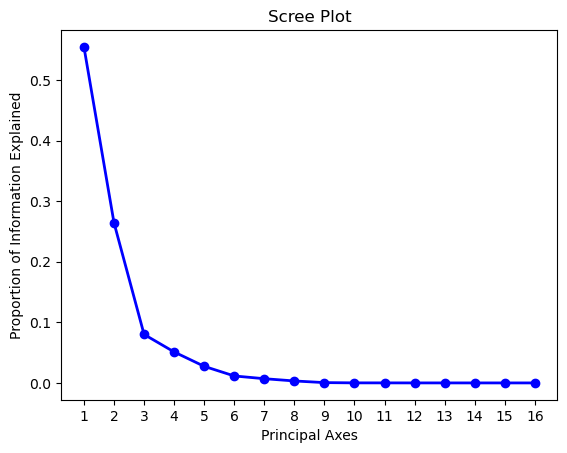

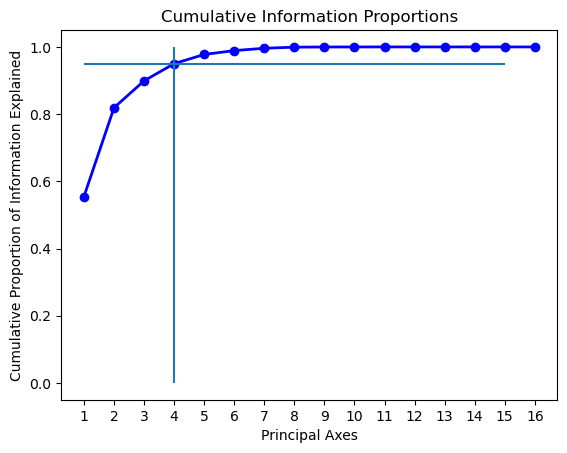

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

eigenvalues = pd.read_csv('data/eigenvalues.csv')['eigenvalues'].values

# 1. Find the proportion of information for each eigenvector, which is equal to the eigenvalues divided by the sum of all eigenvalues
info_prop = eigenvalues / eigenvalues.sum()

## Plot the principal axes vs the information proportions for each principal axis

plt.plot(np.arange(1,len(info_prop)+1),info_prop, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Axes')
plt.xticks(np.arange(1,len(info_prop)+1))
plt.ylabel('Proportion of Information Explained')
plt.show()
plt.clf()

# 2. Find the cumulative sum of the proportions
cum_info_prop = np.cumsum(info_prop)

## Plot the cumulative proportions array

plt.plot(np.arange(1,len(info_prop)+1), cum_info_prop, 'bo-', linewidth=2)
plt.hlines(y=.95, xmin=1, xmax=15)
plt.vlines(x=4, ymin=0, ymax=1)
plt.title('Cumulative Information Proportions')
plt.xlabel('Principal Axes')
plt.xticks(np.arange(1,len(info_prop)+1))
plt.ylabel('Cumulative Proportion of Information Explained')
plt.show()

# PCA with Sklearn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


data_matrix = pd.read_csv('data/data_matrix.csv')

# 1. Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd
print(data_matrix_standardized.head())

# 2. Find the principal components
pca = PCA()
components =  pca.fit(data_matrix_standardized).components_
components = pd.DataFrame(components).transpose()
components.index =  data_matrix.columns
print(components)

# 3. Calculate the variance/info ratios
var_ratio = pca.explained_variance_ratio_
var_ratio = pd.DataFrame(var_ratio).transpose()
print(var_ratio)

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.840718  -1.143277        -1.306550        -0.631130     -1.564995   
1 -0.829157  -1.013887        -1.395860        -0.434429     -1.969712   
2 -0.807128  -1.078789        -1.252311        -0.585713     -1.514236   
3 -0.785712  -0.977179        -1.278778        -0.439274     -1.741554   
4 -0.781210  -1.097344        -1.380420        -0.266654     -2.117915   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -2.185640   -0.841420      -1.063302  0.289077  0.367600   1.423815   
1     -3.685904   -0.826071      -1.044178  0.697451 -0.462889   0.231046   
2     -2.045261   -0.808674      -1.008047  0.578174  0.518398   1.252819   
3     -2.742110   -0.773947      -0.973301  0.671235 -2.241685   0.515030   
4     -4.534862   -0.784257      -0.966044  0.476003  0.804743   1.874924   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     1.839049     

        PC1       PC2       PC3       PC4
0 -4.981378  1.824630 -0.748993 -0.390797
1 -5.436593  2.932257 -2.182294 -0.431944
2 -4.757913  1.826817 -0.514019 -0.125849
3 -4.300383  2.003587 -3.554316  0.082961
4 -6.349107  4.088055 -1.179156 -0.830327


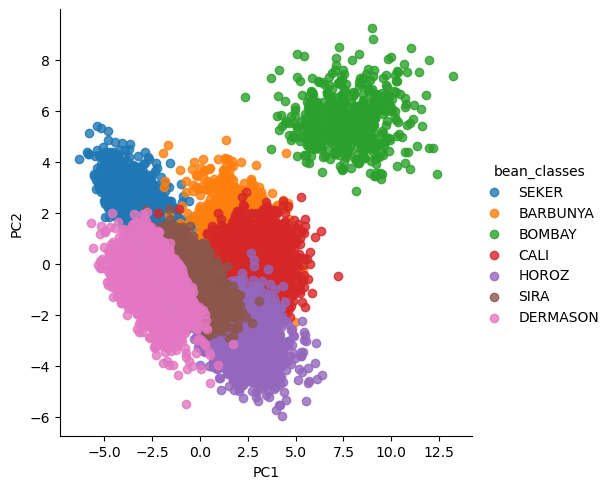

In [ ]:
## Projecting data onto the principal axes

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

data_matrix_standardized = pd.read_csv('data/data_matrix_standardized.csv')
classes = pd.read_csv('data/classes.csv')['Class']

# 1. Transform the data into 4 new features using the first PCs
pca = PCA(n_components = 4)
data_pcomp = pca.fit_transform(data_matrix_standardized)
data_pcomp = pd.DataFrame(data_pcomp)
data_pcomp.columns = ['PC1', 'PC2', 'PC3', 'PC4']
print(data_pcomp.head())

## 2. Plot the first two principal components colored by the bean classes

data_pcomp['bean_classes'] = classes
sns.lmplot(x='PC1', y='PC2', data=data_pcomp, hue='bean_classes', fit_reg=False)
plt.show()

In [1]:
## PCA as features

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
 
 
data_matrix_standardized = pd.read_csv('data/data_matrix_standardized.csv')
classes = pd.read_csv('data/classes.csv')
 
# We will use the classes as y
y = classes.Class.astype('category').cat.codes
 
# Get principal components with 4 features and save as X
pca_1 = PCA(n_components=4) 
X = pca_1.fit_transform(data_matrix_standardized) 
 
# Split the data into 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train) 
 
# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 4 PCA features: {score_1}')
 
# Split the original data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(data_matrix_standardized, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)
 
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with original features: {score_2}')


Score for model with 4 PCA features: 0.8472840605520926
Score for model with original features: 0.9171861086375779


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\jeanpc\scikit_learn_data
Number of features(pixels) per image: 4096
Square image side length: 64


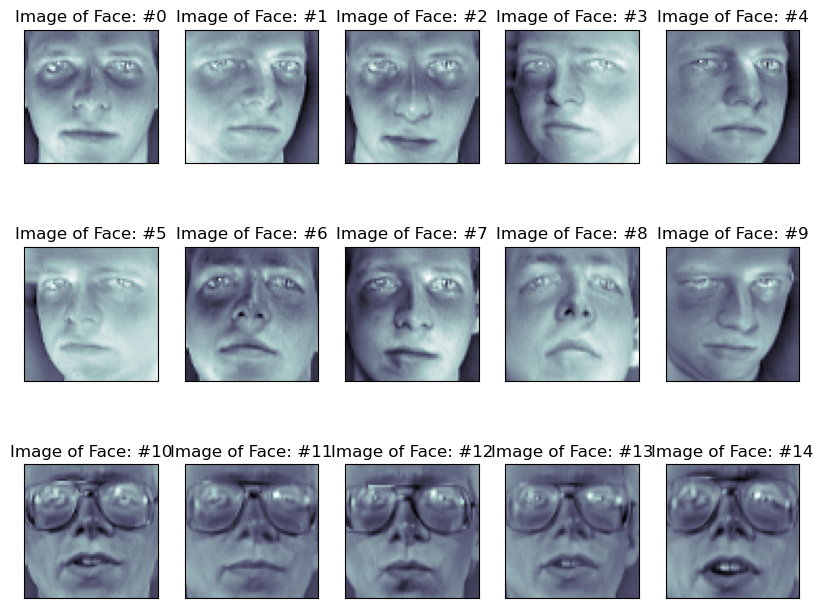

In [2]:
## PCA for image I

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
 
 
# Download the data from sklearn's datasets
faces = datasets.fetch_olivetti_faces()['data']
 
# 1. Standardize the images using the mean and standard deviation
faces_mean = faces.mean(axis=0)
faces_std = faces.std(axis=0)
faces_standardized = (faces - faces_mean) / faces_std
 
 
# 2. Find the side length of a square image
n_images, n_features = faces_standardized.shape
side_length = int(np.sqrt(n_features))
print(f'Number of features(pixels) per image: {n_features}')
print(f'Square image side length: {side_length}')
 
 
# 3. Paste the plotting code below:

# Create an empty 10x8 plot
fig = plt.figure(figsize=(10, 8))

# Observe the first 15 images.
for i in range(15):

    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Image of Face: #{i}')

    # Get an image from a row based on the current value of i
    face_image = faces_standardized[i]

    # Reshape this image into side_length x side_length 
    face_image_reshaped = face_image.reshape(side_length, side_length)

    # Show the image
    ax.imshow(face_image_reshaped, cmap=plt.cm.bone)
plt.show()



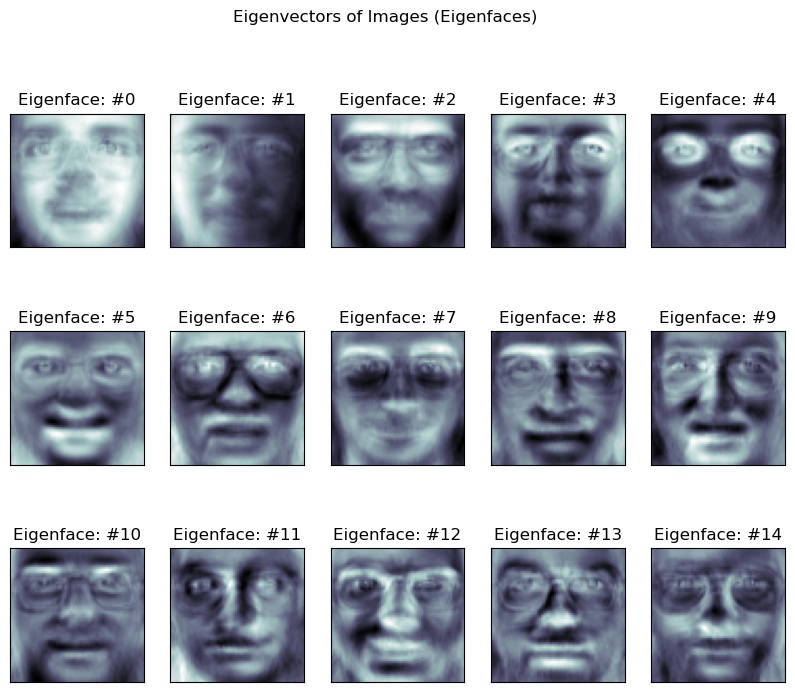

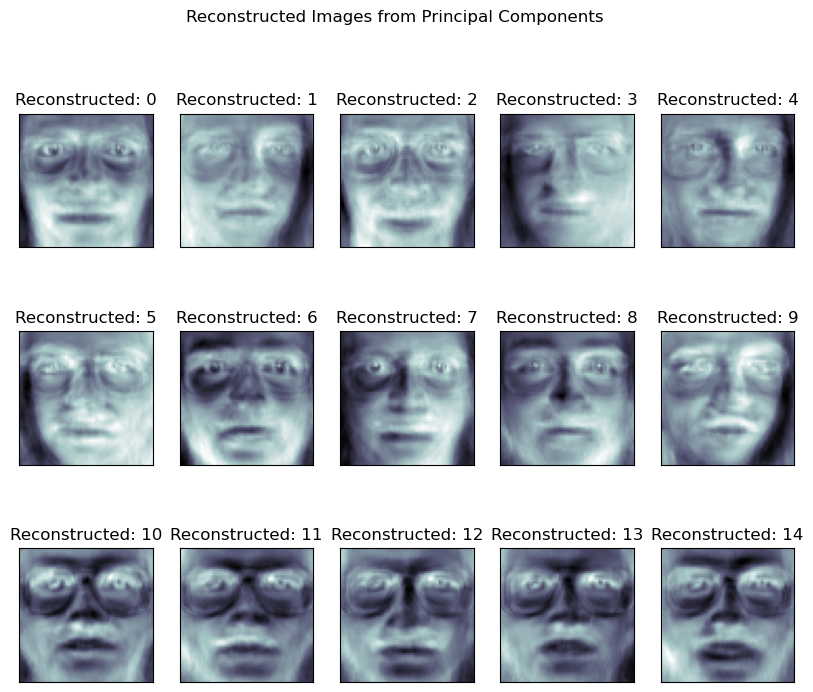

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


faces_standardized = pd.read_csv('data/faces_standardized.csv').values

# 1. Instantiate a PCA object and fit the standardized faces dataset
pca = PCA(n_components=40) 
pca.fit(faces_standardized)

# 2. Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_ 

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface: #{i}')
    
    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()

# 3. Reconstruct images from the compressed principal components
# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized) 

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the reconstructed images 
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i}')

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()
